# 热力地图

作者: 林骥，微信公众号ID：linjiwx，源代码和数据文件保存在 https://github.com/linjiwx/mp


### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

In [1]:
# 导入所需的库
import pandas as pd
import numpy as np
from plotnine import *
from pylab import mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes
from matplotlib.collections import PatchCollection
from matplotlib import cm, colors

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 禁用科学计数法
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
c = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
     '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
     '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 定义数据

In [2]:
# 从 Excel 文件中读取数据
df = pd.read_excel('./data/中国省份坐标.xlsx')
gdp = pd.read_excel('./data/各省2019年GDP数据.xlsx')

# 计算每个省份的中心坐标
df_center = df.groupby('Province').mean()

# 合并省份坐标和数据
dfxy = pd.merge(df_center, gdp, on='Province', how ='left')

# 定义颜色数值
color_value = np.array(dfxy.GDP)

### 3. 开始画图

用「**面向对象**」的方法画图。

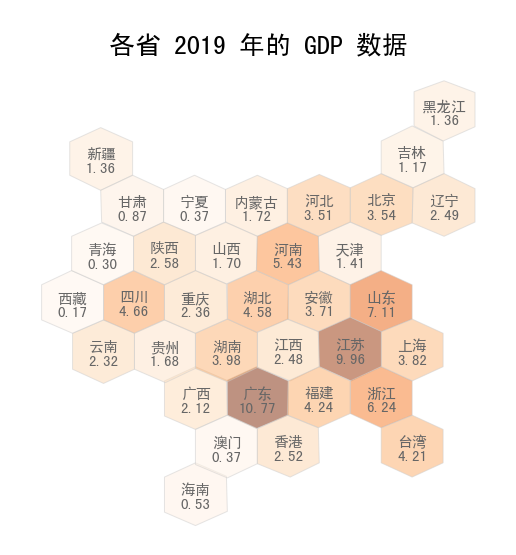

In [5]:
# 使用「面向对象」的方法画图，定义图片的大小
fig, ax = plt.subplots(figsize=(9, 9))

# 设置背景颜色
fig.set_facecolor('w')
ax.set_facecolor('w')

# 设置标题
ax.set_title('\n各省 2019 年的 GDP 数据', loc='center', fontsize=26)

# 循环设置每个省份
patches = []
for Province in np.unique(df['Province']):
    # 筛选每个省份的数据
    dfp = df[df['Province'] == Province]
    
    # 多边形的每个位置
    rect = mpathes.Polygon([(x, y) for x, y in zip(dfp['x'], dfp['y'])])
    patches.append(rect)
    
    # 多边形内部显示省份名称和数据
    ax.text(df_center.loc[Province].x, df_center.loc[Province].y, 
            '\n'+Province+'\n'+'%.2f' % dfxy[dfxy['Province'] == Province].GDP.values[0], 
            fontsize=15, va='center', ha='center', color=c['深灰色'])
    
# 填充形状和颜色
collection = PatchCollection(patches, alpha=0.5, cmap=plt.cm.Oranges, ec=c['浅灰色'], fc='w', lw=1)
collection.set_array(color_value)
ax.add_collection(collection)

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 隐藏 X、Y 轴
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# 避免变形
plt.axis('equal')

plt.show()